# **Penting**
- Jangan mengubah atau menambahkan cell text yang sudah disediakan, Anda hanya perlu mengerjakan cell code yang sudah disediakan.
- Pastikan seluruh kriteria memiliki output yang sesuai, karena jika tidak ada output dianggap tidak selesai.
- Misal, Anda menggunakan df = df.dropna() silakan gunakan df.isnull().sum() sebagai tanda sudah berhasil. Silakan sesuaikan seluruh output dengan perintah yang sudah disediakan.
- Pastikan Anda melakukan Run All sebelum mengirimkan submission untuk memastikan seluruh cell berjalan dengan baik.
- Pastikan Anda menggunakan variabel df dari awal sampai akhir dan tidak diperbolehkan mengganti nama variabel tersebut.
- Hapus simbol pagar (#) pada kode yang bertipe komentar jika Anda menerapkan kriteria tambahan
- Biarkan simbol pagar (#) jika Anda tidak menerapkan kriteria tambahan
- Pastikan Anda mengerjakan sesuai section yang sudah diberikan tanpa mengubah judul atau header yang disediakan.

# **INFORMASI DATASET**

Dataset ini menyajikan gambaran mendalam mengenai perilaku transaksi dan pola aktivitas keuangan, sehingga sangat ideal untuk eksplorasi **deteksi penipuan (fraud detection)** dan **identifikasi anomali**. Dataset ini mencakup **2.512 sampel data transaksi**, yang mencakup berbagai atribut transaksi, demografi nasabah, dan pola penggunaan.

Setiap entri memberikan wawasan komprehensif terhadap perilaku transaksi, memungkinkan analisis untuk **keamanan finansial** dan pengembangan model prediktif.

## Fitur Utama

- **`TransactionID`**: Pengidentifikasi unik alfanumerik untuk setiap transaksi.  
- **`AccountID`**: ID unik untuk setiap akun, dapat memiliki banyak transaksi.  
- **`TransactionAmount`**: Nilai transaksi dalam mata uang, mulai dari pengeluaran kecil hingga pembelian besar.  
- **`TransactionDate`**: Tanggal dan waktu transaksi terjadi.  
- **`TransactionType`**: Tipe transaksi berupa `'Credit'` atau `'Debit'`.  
- **`Location`**: Lokasi geografis transaksi (nama kota di Amerika Serikat).  
- **`DeviceID`**: ID perangkat yang digunakan dalam transaksi.  
- **`IP Address`**: Alamat IPv4 yang digunakan saat transaksi, dapat berubah untuk beberapa akun.  
- **`MerchantID`**: ID unik merchant, menunjukkan merchant utama dan anomali transaksi.  
- **`AccountBalance`**: Saldo akun setelah transaksi berlangsung.  
- **`PreviousTransactionDate`**: Tanggal transaksi terakhir pada akun, berguna untuk menghitung frekuensi transaksi.  
- **`Channel`**: Kanal transaksi seperti `Online`, `ATM`, atau `Branch`.  
- **`CustomerAge`**: Usia pemilik akun.  
- **`CustomerOccupation`**: Profesi pengguna seperti `Dokter`, `Insinyur`, `Mahasiswa`, atau `Pensiunan`.  
- **`TransactionDuration`**: Lama waktu transaksi (dalam detik).  
- **`LoginAttempts`**: Jumlah upaya login sebelum transaksi—jumlah tinggi bisa mengindikasikan anomali.

Tugas kamu adalah membuat model clustering yang selanjutnya akan digunakan untuk membuat model klasifikasi.


# **1. Import Library**
Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning. Semua library yang dibutuhkan harus **import** di **cell** ini, jika ada library yang dijalankan di cell lain maka **submission langsung ditolak**

In [ ]:
#Type your code here

import pandas as pd  # Mengimpor pustaka pandas untuk manipulasi dan analisis data
import matplotlib.pyplot as plt  # Mengimpor pustaka matplotlib untuk visualisasi grafik
from yellowbrick.cluster import KElbowVisualizer  # Mengimpor KElbowVisualizer untuk visualisasi metode Elbow

from sklearn.cluster import KMeans, DBSCAN  # Mengimpor algoritma KMeans dan DBSCAN untuk clustering
from sklearn.metrics import silhouette_score  # Mengimpor silhouette_score untuk mengevaluasi hasil clustering

# **2. Memuat Dataset**
Pada tahap ini, Anda perlu memuat dataset ke dalam notebook lalu mengecek informasi dataset sebelum nantinya dilakukan pembersihan. Hal-hal yang perlu dilakukan pada tahapan ini yaitu:
1. **Memahami Struktur Data**
   - Dataset harus mengambil referensi wajib digunakan (bisa dilihat [Disini](https://drive.google.com/drive/folders/1Zs7VmPZ-jNwsRlMKH65Ea-LApSwx6lKx?usp=drive_link))
   - Melakukan loading dataset ke dalam notebook dan menampilkan 5 baris pertama dengan function `head`.
   - Tinjau jumlah baris kolom dan jenis data dalam dataset dengan function `info`.  
   - Menampilkan statistik deskriptif dataset dengan menjalankan `describe`.
   - Pastikan **setiap function tersebut** memiliki **output pada setiap cell** code. Jika tidak **submission langsung ditolak**
   

Gunakan code ini untuk melakukan load data secara otomatis tanpa harus download data tersebut secara manual:
```python
url='https://docs.google.com/spreadsheets/d/e/2PACX-1vTbg5WVW6W3c8SPNUGc3A3AL-AG32TPEQGpdzARfNICMsLFI0LQj0jporhsLCeVhkN5AoRsTkn08AYl/pub?gid=2020477971&single=true&output=csv'
df = pd.read_csv(url)
```

Penting: pada kriteria pertama hindari penggunaan print() dan display() karena seluruh fungsi yang digunakan sudah memiliki standar output dan menghasilkan output yang diharapkan.

Kriteria 1 akan ditolak ketika:
- print(__.head())
- display(___.head())
dst

Kriteria 1 akan diterima ketika Anda menggunakan fungsi yang diminta tanpa menambahkan deskripsi apapun.

In [ ]:
# Load data

url='https://docs.google.com/spreadsheets/d/e/2PACX-1vTbg5WVW6W3c8SPNUGc3A3AL-AG32TPEQGpdzARfNICMsLFI0LQj0jporhsLCeVhkN5AoRsTkn08AYl/pub?gid=2020477971&single=true&output=csv'
df = pd.read_csv(url)

In [ ]:
# Tampilkan 5 baris pertama dengan function head.

df.head()

,TransactionID,AccountID,TransactionAmount,PreviousTransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70.0,Doctor,81.0,1.0,5112.21,2024-11-04 8:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68.0,Doctor,141.0,1.0,13758.91,2024-11-04 8:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19.0,Student,56.0,1.0,1122.35,2024-11-04 8:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26.0,Student,25.0,1.0,8569.06,2024-11-04 8:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,NaN,Student,198.0,1.0,7429.40,2024-11-04 8:06:39


In [ ]:
# Tinjau jumlah baris kolom dan jenis data dalam dataset dengan info.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2537 entries, 0 to 2536
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2508 non-null   object 
 1   AccountID                2516 non-null   object 
 2   TransactionAmount        2511 non-null   float64
 3   PreviousTransactionDate  2509 non-null   object 
 4   TransactionType          2507 non-null   object 
 5   Location                 2507 non-null   object 
 6   DeviceID                 2507 non-null   object 
 7   IP Address               2517 non-null   object 
 8   MerchantID               2514 non-null   object 
 9   Channel                  2510 non-null   object 
 10  CustomerAge              2519 non-null   float64
 11  CustomerOccupation       2514 non-null   object 
 12  TransactionDuration      2511 non-null   float64
 13  LoginAttempts            2516 non-null   float64
 14  AccountBalance          

In [ ]:
# Menampilkan statistik deskriptif dataset dengan menjalankan describe

df.describe()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2511.000000,2519.000000,2511.000000,2516.000000,2510.000000
mean,297.656468,44.678444,119.422939,1.121622,5113.438124
std,292.230367,17.837359,70.078513,0.594469,3897.975861
min,0.260000,18.000000,10.000000,1.000000,101.250000
25%,81.310000,27.000000,63.000000,1.000000,1504.727500
50%,211.360000,45.000000,112.000000,1.000000,4734.110000
75%,413.105000,59.000000,161.000000,1.000000,7672.687500
max,1919.110000,80.000000,300.000000,5.000000,14977.990000


(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

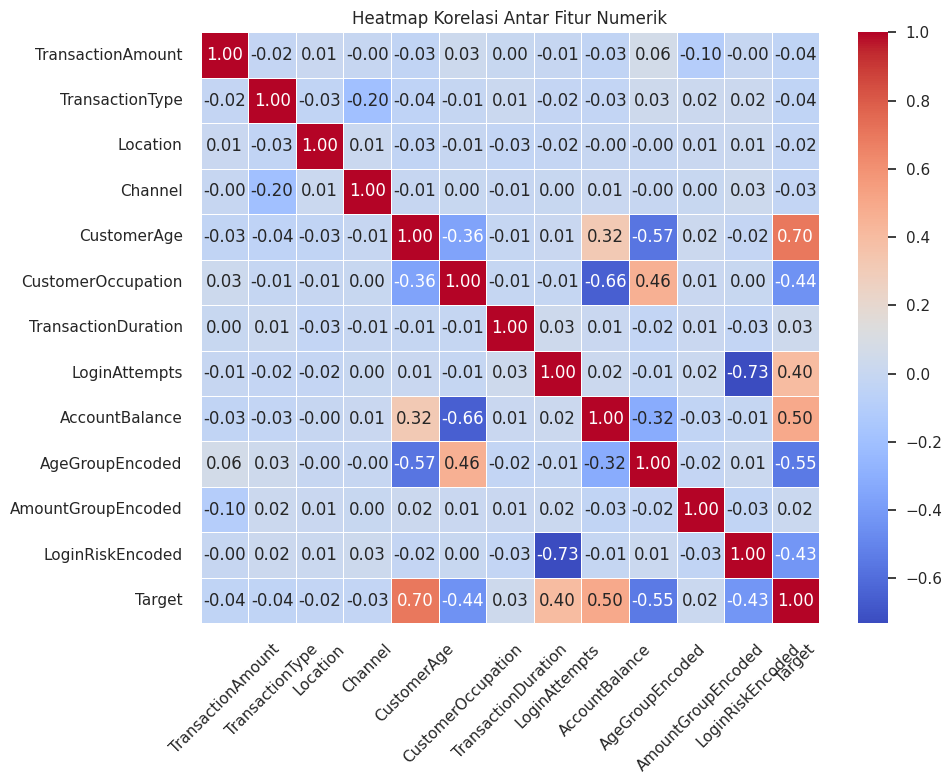

In [2136]:
# Menampilkan korelasi antar fitur (Opsional Skilled 1)

import seaborn as sns
import matplotlib.pyplot as plt

# Hitung korelasi antar kolom numerik
correlation_matrix = df.corr(numeric_only=True)

# Visualisasi heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

plt.title('Heatmap Korelasi Antar Fitur Numerik')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()



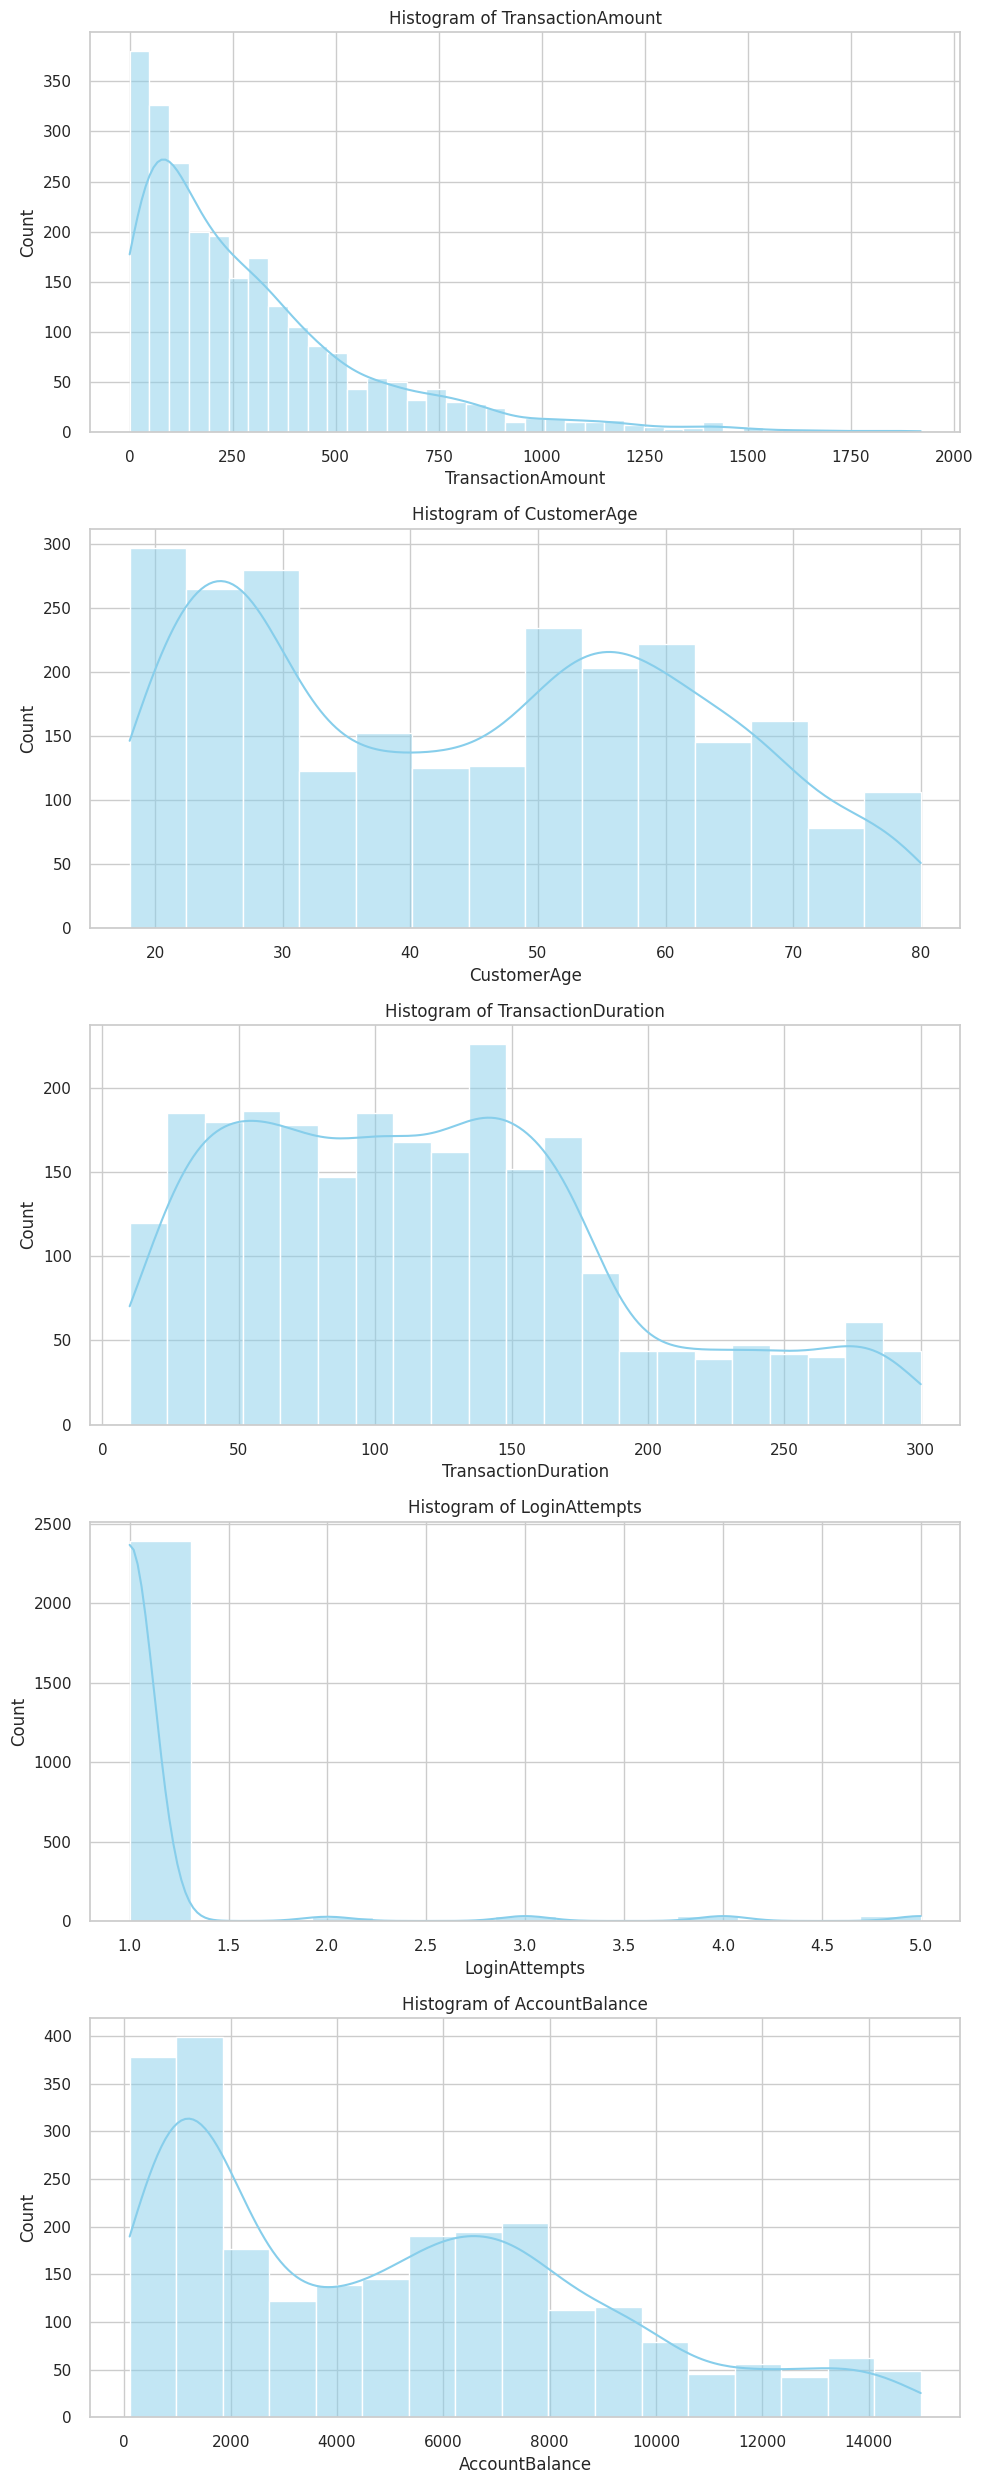

In [ ]:
# Menampilkan histogram untuk semua kolom numerik (Opsional Skilled 1)

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set gaya visualisasi
sns.set(style="whitegrid")

# Kolom numerik yang akan divisualisasikan
numeric_cols = ['TransactionAmount', 'CustomerAge', 'TransactionDuration', 'LoginAttempts', 'AccountBalance']

# Buat subplot: 1 kolom (hanya histogram), sebanyak jumlah fitur
fig, axs = plt.subplots(len(numeric_cols), 1, figsize=(10, 25))

for i, col in enumerate(numeric_cols):
    sns.histplot(df[col].dropna(), kde=True, ax=axs[i], color='skyblue')
    axs[i].set_title(f'Histogram of {col}')
    axs[i].set_xlabel(col)

# Tampilkan layout
plt.tight_layout()
plt.show()


(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

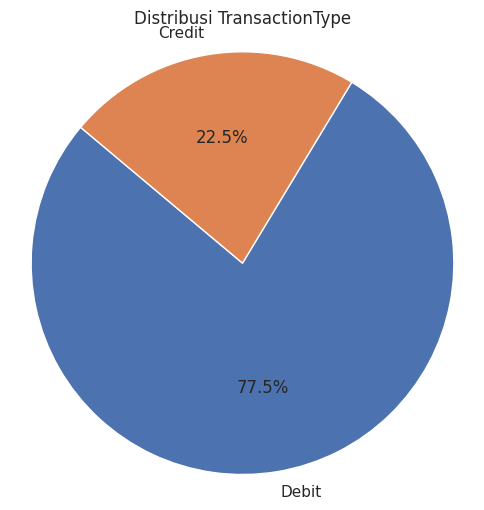

In [ ]:
# Visualisasi yang lebih informatif (Opsional Advanced 1)
import matplotlib.pyplot as plt

# Hitung jumlah masing-masing kategori pada TransactionType
type_counts = df['TransactionType'].value_counts()

# Buat pie chart
plt.figure(figsize=(6, 6))
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribusi TransactionType')
plt.axis('equal')  # memastikan pie berbentuk lingkaran
plt.show()


# **3. Pembersihan dan Pra Pemrosesan Data**

Pada tahap ini, Anda akan melakukan **Pembersihan Dataset** untuk menjadikan dataset mudah diintepretasi dan bisa dilatih. Hal-hal yang wajib kamu lakukan yaitu:

1. **Mengecek dataset** menggunakan isnull().sum() dan duplicated().sum().
2. Melakukan feature scaling menggunakan `MinMaxScaler()` atau `StandardScalar()` untuk fitur numerik.
3. Melakukan feature encoding menggunakan `LabelEncoder()` untuk fitur kategorikal.
4. Melakukan drop pada kolom id.
5. **Ketentuan Cell Code**
   - Pastikan **setiap pemeriksaan tersebut** memiliki **output pada cell-nya**. Jika tidak **submission langsung ditolak**


In [ ]:
# Mengecek dataset menggunakan isnull().sum()

# Hilangin Null values
df.isnull().sum()

,0
TransactionID,29
AccountID,21
TransactionAmount,26
PreviousTransactionDate,28
TransactionType,30
Location,30
DeviceID,30
IP Address,20
MerchantID,23
Channel,27


In [ ]:
# Mengecek dataset menggunakan duplicated().sum()

df.duplicated().sum()

np.int64(21)

In [ ]:
# Melakukan feature scaling menggunakan MinMaxScaler() atau StandardScalar() untuk fitur numerik.
# Pastikan kamu menggunakan function head setelah melalukan scaling.

from sklearn.preprocessing import MinMaxScaler

# Pilih kolom numerik yang ingin di-scale
numeric_cols = ['TransactionAmount', 'CustomerAge', 'TransactionDuration', 'LoginAttempts', 'AccountBalance']


# Inisialisasi scaler
scaler = MinMaxScaler()

# Fit dan transform, lalu overwrite langsung ke DataFrame
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# Lihat hasilnya
df.head()

,TransactionID,AccountID,TransactionAmount,PreviousTransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionDate
0,TX000001,AC00128,0.007207,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,0.838710,Doctor,0.244828,0.0,0.336832,2024-11-04 8:08:08
1,TX000002,AC00455,0.195940,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,0.806452,Doctor,0.451724,0.0,0.918055,2024-11-04 8:09:35
2,TX000003,AC00019,0.065680,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,0.016129,Student,0.158621,0.0,0.068637,2024-11-04 8:07:04
3,TX000004,AC00070,0.096016,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,0.129032,Student,0.051724,0.0,0.569198,2024-11-04 8:09:06
4,TX000005,AC00411,0.006874,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,NaN,Student,0.648276,0.0,0.492591,2024-11-04 8:06:39


In [ ]:
# Melakukan drop pada kolom yang memiliki keterangan id dan IP Address

# Filter dataframe dengan Hapus kolom 'TransactionID', 'AccountID', 'DeviceID', 'IP Address', 'MerchantID'
df = df.drop(columns=['TransactionID', 'AccountID', 'DeviceID', 'IP Address', 'MerchantID'])


In [ ]:
# Melakukan feature encoding menggunakan LabelEncoder() untuk fitur kategorikal.
# Pastikan kamu menggunakan function head setelah melalukan encoding.

from sklearn.preprocessing import LabelEncoder
# Buat instance LabelEncoder
label_encoder = LabelEncoder()

# List kolom kategorikal yang perlu di-encode
categorical_columns = ['Location', 'Channel', 'CustomerOccupation', 'TransactionType']

# Encode kolom kategorikal
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

# Tampilkan DataFrame untuk memastikan encoding telah diterapkan
df.head()

,TransactionAmount,PreviousTransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionDate
0,0.007207,2023-04-11 16:29:14,1,36,0,0.838710,0,0.244828,0.0,0.336832,2024-11-04 8:08:08
1,0.195940,2023-06-27 16:44:19,1,15,0,0.806452,0,0.451724,0.0,0.918055,2024-11-04 8:09:35
2,0.065680,2023-07-10 18:16:08,1,23,2,0.016129,3,0.158621,0.0,0.068637,2024-11-04 8:07:04
3,0.096016,2023-05-05 16:32:11,1,33,2,0.129032,3,0.051724,0.0,0.569198,2024-11-04 8:09:06
4,0.006874,2023-10-16 17:51:24,0,1,2,NaN,3,0.648276,0.0,0.492591,2024-11-04 8:06:39


In [ ]:
# Last checking gunakan columns.tolist() untuk checking seluruh fitur yang ada.
# Perbaiki kode di bawah ini tanpa menambahkan atau mengurangi cell code ini.
# ____.columns.tolist()

df.columns.tolist()

['TransactionAmount',
 'PreviousTransactionDate',
 'TransactionType',
 'Location',
 'Channel',
 'CustomerAge',
 'CustomerOccupation',
 'TransactionDuration',
 'LoginAttempts',
 'AccountBalance',
 'TransactionDate']

(Opsional) Pembersihan dan Pra Pemrosesan Data [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [ ]:
# Menangani data yang hilang (bisa menggunakan dropna() atau metode imputasi fillna()).

df = df.dropna()

In [ ]:
# Menghapus data duplikat menggunakan drop_duplicates().

df.drop_duplicates(inplace=True)

(Opsional) Pembersihan dan Pra Pemrosesan Data [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [ ]:
# Melakukan Handling Outlier Data berdasarkan jumlah outlier, apakah menggunakan metode drop atau mengisi nilai tersebut.

import pandas as pd

Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

# Identifikasi outlier (data di luar Q1 - 1.5*IQR dan Q3 + 1.5*IQR)
outliers = ((df[numeric_cols] < (Q1 - 1.5 * IQR)) | (df[numeric_cols] > (Q3 + 1.5 * IQR)))

# Hitung jumlah outlier per kolom
outlier_counts = outliers.sum()
print(outlier_counts)
# Hapus baris yang mengandung outlier
df_no_outlier = df[~((df[numeric_cols] < (Q1 - 1.5 * IQR)) |
                     (df[numeric_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

TransactionAmount      104
CustomerAge              0
TransactionDuration      0
LoginAttempts          113
AccountBalance           0
dtype: int64


In [ ]:
# Melakukan binning data berdasarkan kondisi rentang nilai pada fitur numerik,
# lakukan pada satu sampai dua fitur numerik.
# Silahkan lakukan encode hasil binning tersebut menggunakan LabelEncoder.
# Pastikan kamu mengerjakan tahapan ini pada satu cell.

from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Salin dataframe jika kamu hanya ambil sebagian sebelumnya
df = df.copy()

# Binning (dalam skala Min-Max)
# Gunakan .loc agar aman dari SettingWithCopyWarning
df.loc[:, 'AgeGroup'] = pd.cut(df['CustomerAge'],
                               bins=[0.0, 0.3, 0.6, 0.8, 1.0],
                               labels=['Young', 'Adult', 'Senior', 'Elderly'])

df.loc[:, 'AmountGroup'] = pd.cut(df['TransactionAmount'],
                                  bins=[-0.01, 0.05, 0.2, 0.5, 1.0],
                                  labels=['Low', 'Medium', 'High', 'Very High'])

df.loc[:, 'LoginRiskLevel'] = pd.cut(df['LoginAttempts'],
                                     bins=[-0.01, 0.2, 0.4, 0.7, 1.0],
                                     labels=['Very Safe', 'Safe', 'Warning', 'High Risk'])

# Encode hasil binning
le_age = LabelEncoder()
le_amount = LabelEncoder()
le_login = LabelEncoder()
df.loc[:, 'AgeGroupEncoded'] = le_age.fit_transform(df['AgeGroup'])
df.loc[:, 'AmountGroupEncoded'] = le_amount.fit_transform(df['AmountGroup'])
df.loc[:, 'LoginRiskEncoded'] = le_login.fit_transform(df['LoginRiskLevel'])


# **4. Membangun Model Clustering**
Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan.
1. Pastikan Anda menggunakan dataframe yang sudah melalui processing sesuai dengan levelnya (Basic, Skilled, Advanced)
2. Melakukan visualisasi Elbow Method untuk menentukan jumlah cluster terbaik menggunakan `KElbowVisualizer()`.
3. Menggunakan algoritma K-Means Clustering dengan `sklearn.cluster.KMeans()`.
4. Jalankan cell code `joblib.dump(model_kmeans, "model_clustering.h5")` untuk menyimpan model yang sudah dibuat.

In [2137]:
# Gunakan describe untuk memastikan proses clustering menggunakan dataset hasil preprocessing
# Lengkapi kode ini dengan mengubah nama DataFrame yang akan dilatih.
# Kode harus digunakan dan dilarang menambahkan syntax lainnya pada cell ini.
# ___.describe()

df.describe()


,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,AgeGroupEncoded,AmountGroupEncoded,LoginRiskEncoded,Target
count,2348.000000,2348.000000,2348.000000,2348.000000,2348.000000,2348.000000,2348.000000,2348.000000,2348.000000,2348.000000,2348.000000,2348.000000,2348.000000
mean,0.154444,0.788756,21.424617,1.011073,0.430476,1.528535,0.378091,0.030239,0.336489,1.740204,1.296848,1.953152,0.655451
std,0.152255,0.437496,12.432136,0.829195,0.287711,1.154655,0.243118,0.147198,0.262597,1.279700,0.867462,0.344688,0.544665
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.042249,1.000000,11.000000,0.000000,0.145161,0.000000,0.182759,0.000000,0.093553,0.000000,1.000000,2.000000,0.000000
50%,0.109899,1.000000,21.000000,1.000000,0.435484,2.000000,0.351724,0.000000,0.309532,2.000000,1.000000,2.000000,1.000000
75%,0.214105,1.000000,32.000000,2.000000,0.661290,3.000000,0.524138,0.000000,0.510548,3.000000,2.000000,2.000000,1.000000
max,1.000000,2.000000,43.000000,3.000000,1.000000,4.000000,1.000000,1.000000,1.000000,4.000000,3.000000,3.000000,2.000000


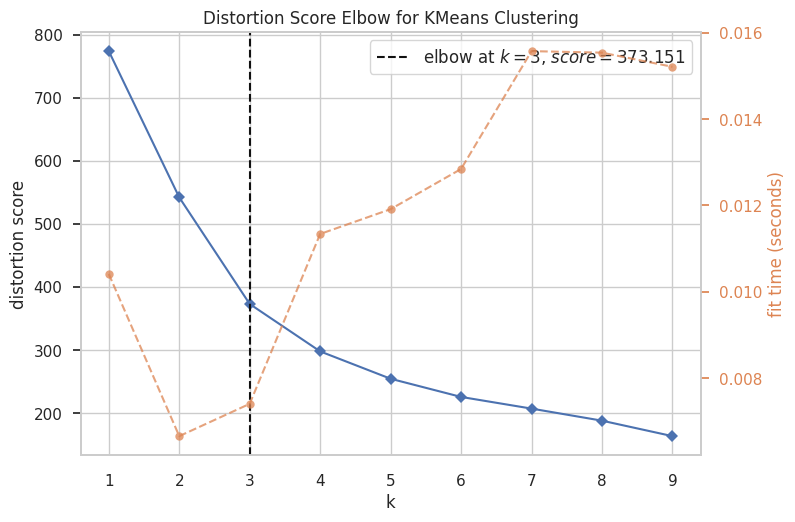

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
# Melakukan visualisasi Elbow Method menggunakan KElbowVisualizer()

X = df[['CustomerAge', 'TransactionDuration', 'AccountBalance', 'LoginRiskEncoded']]

# Inisialisasi model KMeans tanpa parameter awal
kmeans = KMeans()

# Inisialisasi visualizer KElbow untuk menentukan jumlah cluster optimal
visualizer = KElbowVisualizer(kmeans, k=(1, 10))

# Fit visualizer dengan data untuk menemukan jumlah cluster optimal
visualizer.fit(X)

# Menampilkan grafik elbow untuk analisis
visualizer.show()

In [ ]:
# Menggunakan algoritma K-Means Clustering

from sklearn.cluster import KMeans

# Inisialisasi dan melatih model KMeans dengan jumlah cluster = 3
kmeans = KMeans(n_clusters=3, random_state=0, n_init=10)
kmeans.fit(X)

# Mendapatkan label cluster
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Mendapatkan jumlah cluster
k = 3

Jalankan cell code ini untuk menyimpan model kamu.

In [ ]:
# Menyimpan model menggunakan joblib
import joblib
joblib.dump(kmeans, "model_clustering.h5")

['model_clustering.h5']

(Opsional) Membangun Model Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [ ]:
# Menghitung dan menampilkan nilai Silhouette Score.

from sklearn.metrics import silhouette_score
score = silhouette_score(X, labels)
print(f"Silhouette Score: {score:.4f}")

Silhouette Score: 0.3294


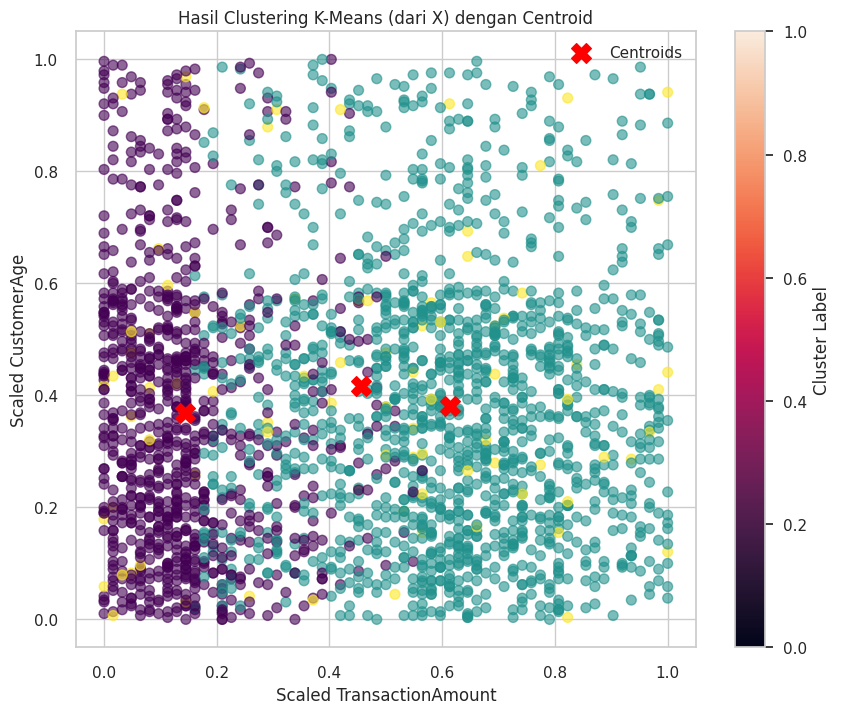

In [ ]:
# Membuat visualisasi hasil clustering

import matplotlib.pyplot as plt

X = X.values  # jika X adalah DataFrame

plt.figure(figsize=(10, 8))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', marker='o', s=50, alpha=0.6)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', s=200, color='red', label='Centroids')
plt.title('Hasil Clustering K-Means (dari X) dengan Centroid')
plt.xlabel('Scaled TransactionAmount') # Assuming the first column is TransactionAmount
plt.ylabel('Scaled CustomerAge')      # Assuming the second column is CustomerAge
plt.colorbar(label='Cluster Label')
plt.legend()
plt.grid(True)
plt.show()

(Opsional) Membangun Model Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [ ]:
# Membangun model menggunakan PCA.
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
# Menyimpan data PCA sebagai Dataframe dengan nama PCA_<numbers>
df_pca = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2'])

#Pastikan kamu membangun model Kmeans baru dengan data yang sudah dimodifikasi melalui PCA.
kmeansv2 = KMeans(n_clusters= 3)
kmeansv2.fit(df_pca)

KMeans(n_clusters=3)

In [ ]:
# Simpan model PCA sebagai perbandingan dengan menjalankan cell code ini joblib.dump(model,"PCA_model_clustering.h5")
# Pastikan yang disimpan model yang sudah melalui .fit berdasarkan dataset yang sudah dilakukan PCA
joblib.dump(kmeansv2, "PCA_model_clustering.h5")

['PCA_model_clustering.h5']

# **5. Interpretasi Cluster**

## **a. Interpretasi Hasil Clustering**
1. **Contoh Interpretasi:**
- **Cluster 1: (Nasabah Bertransaksi dan Pendapatan Besar)**:
  - **Rata-rata (mean) Annual Income:** 0.953 (48,260)
  - **Rata-rata (mean) Spending Score:** 0.8 (56.48)
  - **Analisis:** Cluster ini mencakup pelanggan dengan pendapatan tahunan tinggi dan tingkat pengeluaran yang cukup tinggi. Pelanggan dalam cluster ini cenderung memiliki daya beli yang tinggi dan mereka lebih cenderung untuk membelanjakan sebagian besar pendapatan mereka. Sehingga rekomendasi pada kelompok nasabah ini adalah dengan menawarkan produk-produk investasi atau perbankan yang berkualitas tinggi.


In [ ]:
# Menampilkan analisis deskriptif minimal mean, min dan max untuk fitur numerik.
# Silakan menambahkan fungsi agregasi lainnya untuk experience lebih baik.
# pastikan output menghasilkan agregasi dan groupby bersamaan dengan mean, min, dan max.

# Tambahkan label cluster ke DataFrame
df['Cluster'] = labels

# Pilih kolom numerik untuk analisis
numeric_cols = ['TransactionAmount', 'CustomerAge', 'TransactionDuration', 'LoginAttempts', 'AccountBalance']

# Lakukan groupby berdasarkan cluster dan hitung statistik deskriptif
cluster_summary = df.groupby('Cluster')[numeric_cols].agg(['mean', 'min', 'max'])

# Tampilkan hasil
print(cluster_summary)

        TransactionAmount                     CustomerAge                     \
                     mean       min       max        mean      min       max   
Cluster                                                                        
0                0.162510  0.000000  0.918269    0.144565  0.00000  0.564516   
1                0.148996  0.000031  1.000000    0.614642  0.16129  1.000000   
2                0.157893  0.000870  0.797900    0.456665  0.00000  1.000000   

        TransactionDuration                     LoginAttempts             \
                       mean       min       max          mean   min  max   
Cluster                                                                    
0                  0.369746  0.000000  1.000000      0.005605  0.00  0.5   
1                  0.381126  0.000000  1.000000      0.007283  0.00  0.5   
2                  0.417574  0.003448  0.968966      0.674699  0.25  1.0   

        AccountBalance                     
                  

1. Cluster 0:
Rata-rata/mean TransactionAmount: 0.162 (Rendah), 
Rata-Rata CustomerAge: 0.144 (Usia sangat muda), 
Rata-Rata TransactionDuration: 0.369 (Sedang), 
Rata-Rata LoginAttempts: 0.005 (Sangat rendah)
Rata-Rata AccountBalance: 0.153 (Saldo rendah)
Analisis: Cluster ini menggambarkan tipe nasabah dengan Usia muda + Account Balance paling rendah,
dari sifat Transaction Duration dan Login Attempts, cluster ini menunjukan sifat transaksi yang stabil dan konservatif (Tidak Mencurigakan)
Rekomendasi: Tawarkan produk tabungan pemula, akun digital, dan edukasi keuangan


Cluster 1:
Rata-Rata TransactionAmount: 0.148 (Rendah), 
Rata-Rata CustomerAge: 0.614 (Usia lansia), 
Rata-Rata TransactionDuration: 0.381 (Sedang), 
Rata-Rata LoginAttempts: 0.007 (Sedikit)
Rata-Rata AccountBalance: 0.454 (Saldo cukup tinggi menengah)
Analisis: Cluster ini menggambarkan tipe nasabah dengan Umur Lansia Awal + login dan durasi moderat (Tidak mencurigakan)
Rekomendasi: Tawarkan layanan perencanaan pensiun, produk tabungan bunga tinggi, atau investasi konservatif.


Cluster 2:
Rata-rata/mean TransactionAmount: 0.157 (Rendah), 
Rata-Rata CustomerAge: 0.456 (Usia sedang), 
Rata-Rata TransactionDuration: 0.417 (tinggi), 
Rata-Rata LoginAttempts: 0.674(Tinggi),
Rata-Rata AccountBalance: 0.365 (Menengah)
Analisis: CLuster ini menggambarkan tipe nasabah dengan Durasi tinggi + login attempts paling tinggi+ rata-rata umur dewasa tengah yangkemungkinan besar mengindikasikan rawan fault detection/potensi risiko keamanan atau kebiasaan login tidak normal. (Mencurigakan)
Rekomendasi: Perlu perhatian pada sisi keamanan digital, bisa tawarkan verifikasi dua langkah, asuransi keamanan siber

In [ ]:
# Cluster 0:
# Rata-rata/mean TransactionAmount: 0.162 (Rendah), CustomerAge: 0.144 (Usia sangat muda), TransactionDuration: 0.369 (Sedang), LoginAttempts: 0.005 (Sangat rendah)
# AccountBalance: 0.153 (Saldo rendah)
# Cluster ini menggambarkan tipe nasabah dengan Usia muda + Account Balance paling rendah,
# dari sifat Transaction Duration dan Login Attempts, cluster ini menunjukan sifat transaksi yang stabil dan konservatif (Tidak Mencurigakan)
# Rekomendasi: Tawarkan produk tabungan pemula, akun digital, dan edukasi keuangan


# Cluster 1:
# TransactionAmount: 0.148 (Rendah), CustomerAge: 0.614 (Usia lansia), TransactionDuration: 0.381 (Sedang), LoginAttempts: 0.007 (Sedikit)
# AccountBalance: 0.454 (Saldo cukup tinggi menengah)
# Cluster ini menggambarkan tipe nasabah dengan Umur Lansia Awal + login dan durasi moderat (Tidak mencurigakan)
# Rekomendasi: Tawarkan layanan perencanaan pensiun, produk tabungan bunga tinggi, atau investasi konservatif.


# Cluster 2:
# Rata-rata/mean TransactionAmount: 0.157 (Rendah), CustomerAge: 0.456 (Usia sedang), TransactionDuration: 0.417 (tinggi), LoginAttempts: 0.674(Tinggi),
# AccountBalance: 0.365 (Menengah)
# CLuster ini menggambarkan tipe nasabah dengan Durasi tinggi + login attempts paling tinggi+ rata-rata umur dewasa tengah yang
# kemungkinan besar mengindikasikan rawan fault detection/potensi risiko keamanan atau kebiasaan login tidak normal. (Mencurigakan)
# Rekomendasi: Perlu perhatian pada sisi keamanan digital, bisa tawarkan verifikasi dua langkah, asuransi keamanan siber

## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya.
1. **Cluster 1: (___)**:
  - **Rata-rata (mean) <Fitur>:** <Sebelum inverse> <Setelah inverse>
  - **Analisis:** Cluster ini ...

# **6. Mengeksport Data**

1. Simpan nama kolom hasil clustering dengan nama `Target`.
2. Simpan hasilnya ke dalam file CSV menggunakan function `to_csv()`.

In [ ]:
# Pastikan nama kolom clustering sudah diubah menjadi Target
df = df.rename(columns={'Cluster': 'Target'})

In [ ]:
# Simpan Data
df.to_csv('data_clustering.csv', index=False)

(Opsional) Interpretasi Hasil Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [ ]:
# inverse dataset ke rentang normal untuk numerikal
# df[numerical_cols] = <nama_scaler>.inverse_transform(df[numerical_cols])
# tampilkan dataset yang sudah di-inverse
# ___.head()

In [ ]:
# inverse dataset yang sudah diencode ke kategori aslinya.
# Lengkapi kode berikut jika ingin menerapkan kriteria ini (silakan hapus simbol pagar pada kode yang akan digunakan.)
# for ___ in categorical_cols:
#     ___ = encoders[col]
#     df[col] = ___.inverse_transform(df_inverse[col].astype(int))
# tampilkan dataset yang sudah di-inverse
# ___.head()

In [ ]:
# Lakukan analisis deskriptif minimal mean, min dan max untuk fitur numerik dan mode untuk kategorikal seperti pada basic tetapi menggunakan data yang sudah diinverse.
# pastikan output menghasilkan agregasi dan groupby bersamaan dengan mean, min, dan max kembali setelah melakukan inverse.

## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya setelah inverse.
1. **Cluster 1: (___)**:
  - **Rata-rata (mean) <Fitur>:** <Sebelum inverse> <Setelah inverse>
  - **Analisis:** Cluster ini ...

(Opsional) Interpretasi Hasil Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [ ]:
# Mengintegrasikan kembali data yang telah di-inverse dengan hasil cluster.

In [ ]:
# Simpan Data
# ___.to_csv('data_clustering_inverse.csv', index=False)

End of Code.